<a href="https://colab.research.google.com/github/larislima11/ETL-data-analysis-supermarket-sales/blob/main/Cenario8_LarissaLima_CaioMendes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clientes:
   id_cliente  idade genero localizacao
0           1     25      F      Centro
1           2     40      M  Zona Norte
2           3     32      F    Zona Sul

Vendas:
   id_venda  id_produto  valor  hora_compra  id_cliente
0         1          10  23.50           14           3
1         2          25  50.20           15           7
2         3          15  12.99           10          12

Produtos:
   id_produto    categoria  preco
0           1    alimentos    5.0
1           2      bebidas   12.5
2           3  eletrônicos  150.0
id_cliente     0
idade          0
genero         0
localizacao    0
dtype: int64
id_venda       0
id_produto     0
valor          0
hora_compra    0
id_cliente     0
dtype: int64
id_produto    0
categoria     0
preco         0
dtype: int64
   id_cliente  ticket_medio
0           3         23.50
1           7         50.20
2          12         12.99
Quantidade média de itens por compra: 1.0


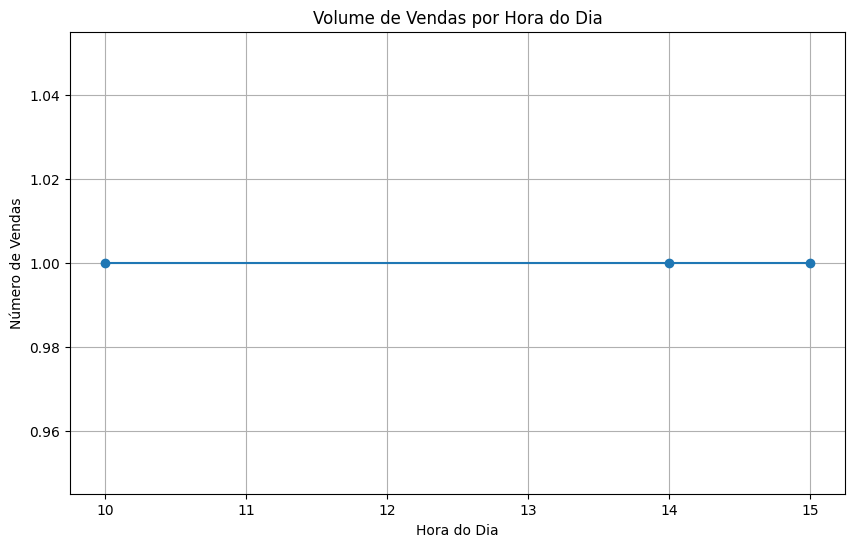

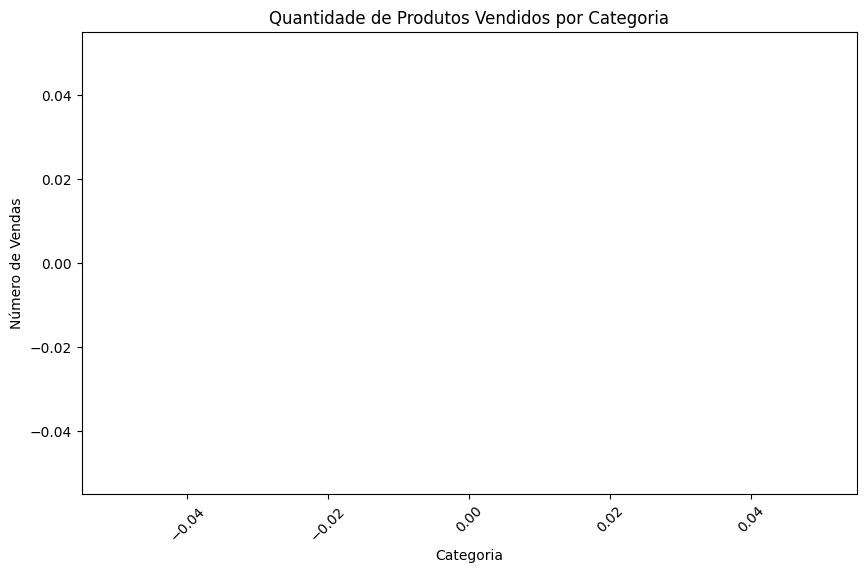

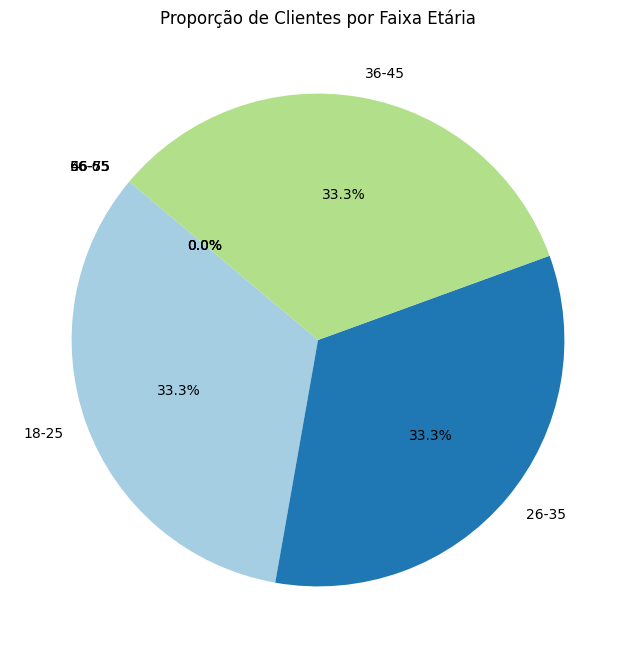

In [8]:
import pandas as pd

clientes = pd.read_csv('clientees.csv')
vendas = pd.read_csv('vendas.csv')
produtos = pd.read_csv('produtos.csv')

print("Clientes:")
print(clientes.head())
print("\nVendas:")
print(vendas.head())
print("\nProdutos:")
print(produtos.head())

print(clientes.isnull().sum())
print(vendas.isnull().sum())
print(produtos.isnull().sum())

clientes.drop_duplicates(inplace=True)
vendas.drop_duplicates(inplace=True)
produtos.drop_duplicates(inplace=True)

# Calcular o ticket médio por cliente
ticket_medio = vendas.groupby('id_cliente')['valor'].mean().reset_index()
ticket_medio.columns = ['id_cliente', 'ticket_medio']

print(ticket_medio.head())

# Calcular a quantidade média de itens por compra
qtd_media_itens = vendas.groupby('id_venda')['id_produto'].count().mean()

print(f"Quantidade média de itens por compra: {qtd_media_itens}")

import matplotlib.pyplot as plt

# Contar o número de vendas por hora
vendas_por_hora = vendas.groupby('hora_compra')['id_venda'].count().reset_index()

# gráfico de linhas
plt.figure(figsize=(10,6))
plt.plot(vendas_por_hora['hora_compra'], vendas_por_hora['id_venda'], marker='o')
plt.title('Volume de Vendas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Vendas')
plt.grid(True)
plt.show()

# Juntar as tabelas de vendas e produtos para obter as categorias dos produtos vendidos
vendas_produtos = vendas.merge(produtos, on='id_produto')

# Contar o número de vendas por categoria de produto
produtos_por_categoria = vendas_produtos.groupby('categoria')['id_venda'].count().reset_index()

# gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(produtos_por_categoria['categoria'], produtos_por_categoria['id_venda'], color='skyblue')
plt.title('Quantidade de Produtos Vendidos por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.show()

# faixas etárias para os clientes
clientes['faixa_etaria'] = pd.cut(clientes['idade'], bins=[18, 25, 35, 45, 55, 65, 75], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75'])

# Contar a proporção de clientes por faixa etária
proporcao_clientes = clientes['faixa_etaria'].value_counts()

#  gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(proporcao_clientes, labels=proporcao_clientes.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proporção de Clientes por Faixa Etária')
plt.show()


